# NBA ALL STAR PREDICTION
 


#### Importing neccessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

#### Importing players and all stars datasets


In [2]:
players = pd.read_csv("./datasets/Seasons_Stats.csv")
all_stars = pd.read_csv("./datasets/NBA All Stars 2000-2016 - Sheet1.csv")

In [3]:
players = players[players['Year'] > 2006]
all_stars = all_stars[all_stars['Year'] > 2006]


#### Feature Analysis

In [4]:
print(players.shape,all_stars.shape, sep='\n')

(6455, 53)
(258, 9)


In [5]:
print(players.columns,all_stars.columns, sep='\n\n')

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

Index(['Year', 'Player', 'Pos', 'HT', 'WT', 'Team', 'Selection Type',
       'NBA Draft Status', 'Nationality'],
      dtype='object')


In [6]:
players.sample(10)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
21550,21550,2012.0,Larry Sanders,PF,23.0,MIL,52.0,0.0,643.0,13.3,...,0.474,62.0,98.0,160.0,33.0,32.0,76.0,43.0,133.0,186.0
24263,24263,2017.0,Bryn Forbes,SG,23.0,SAS,36.0,0.0,285.0,5.9,...,0.833,2.0,21.0,23.0,23.0,1.0,0.0,11.0,20.0,94.0
23757,23757,2016.0,Ryan Hollins,C,31.0,WAS,5.0,3.0,48.0,7.2,...,NaN,7.0,4.0,11.0,0.0,0.0,1.0,3.0,4.0,8.0
20421,20421,2010.0,Jeff Teague,PG,21.0,ATL,71.0,3.0,719.0,11.0,...,0.837,5.0,62.0,67.0,122.0,34.0,11.0,50.0,82.0,228.0
23278,23278,2015.0,Shabazz Muhammad,SG,22.0,MIN,38.0,13.0,866.0,19.9,...,0.717,63.0,91.0,154.0,44.0,18.0,7.0,35.0,49.0,512.0
23767,23767,2016.0,Kris Humphries,PF,30.0,WAS,28.0,14.0,466.0,11.8,...,0.935,26.0,89.0,115.0,16.0,3.0,14.0,20.0,42.0,180.0
18320,18320,2007.0,Will Conroy,SG,24.0,MEM,3.0,0.0,17.0,4.2,...,NaN,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0
24012,24012,2016.0,Lance Stephenson,SF,25.0,MEM,26.0,3.0,692.0,17.1,...,0.815,21.0,94.0,115.0,73.0,19.0,6.0,46.0,56.0,369.0
20942,20942,2011.0,Tony Parker,PG,28.0,SAS,78.0,78.0,2528.0,20.4,...,0.769,30.0,208.0,238.0,513.0,90.0,3.0,200.0,135.0,1368.0
19191,19191,2008.0,J.J. Redick,SG,23.0,ORL,34.0,0.0,276.0,12.7,...,0.794,1.0,22.0,23.0,16.0,4.0,0.0,15.0,29.0,140.0


In [7]:
all_stars.sample(10)

,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality
239,2007,Allen Iverson,G,6-0,165,Denver Nuggets,Western All-Star Fan Vote Selection,1996 Rnd 1 Pick 1,United States
189,2009,Carmelo Anthony,F,6-8,240,Denver Nuggets,Western All-Star Fan Vote Selection,2003 Rnd 1 Pick 3,United States
112,2012,Zach Randolph,PF,6-9,260,Memphis Grizzlies,Western All-Star Coaches Selection,2001 Rnd 1 Pick 19,United States
212,2008,David West,PF,6-9,250,New Orleans Hornets,Western All-Star Coaches Selection,2003 Rnd 1 Pick 18,United States
168,2010,Dwight Howard,C,6-11,265,Orlando Magic,Eastern All-Star Fan Vote Selection,2004 Rnd 1 Pick 1,United States
28,2015,Kyle Lowry,PG,6-0,205,Toronto Raptors,Eastern All-Star Fan Vote Selection,2006 Rnd 1 Pick 24,United States
243,2007,Yao Ming,C,7-6,310,Houston Rockets,Western All-Star Fan Vote Selection,2002 Rnd 1 Pick 1,China
93,2013,Kyrie Irving,G,6-3,193,Cleveland Cavaliers,Eastern All-Star Fan Vote Selection,2011 Rnd 1 Pick 1,United States\nAustralia
2,2016,Kevin Durant,SF,6-9,240,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States
130,2011,LeBron James,F,6-8,250,Miami Heat,Eastern All-Star Fan Vote Selection,2003 Rnd 1 Pick 1,United States


In [8]:
players.drop(columns=['Unnamed: 0','blank2','blanl'], axis =1, inplace=True)

In [9]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6455 entries, 18226 to 24690
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    6455 non-null   float64
 1   Player  6455 non-null   object 
 2   Pos     6455 non-null   object 
 3   Age     6455 non-null   float64
 4   Tm      6455 non-null   object 
 5   G       6455 non-null   float64
 6   GS      6455 non-null   float64
 7   MP      6455 non-null   float64
 8   PER     6452 non-null   float64
 9   TS%     6422 non-null   float64
 10  3PAr    6422 non-null   float64
 11  FTr     6422 non-null   float64
 12  ORB%    6452 non-null   float64
 13  DRB%    6452 non-null   float64
 14  TRB%    6452 non-null   float64
 15  AST%    6452 non-null   float64
 16  STL%    6452 non-null   float64
 17  BLK%    6452 non-null   float64
 18  TOV%    6428 non-null   float64
 19  USG%    6452 non-null   float64
 20  OWS     6455 non-null   float64
 21  DWS     6455 non-null   float64


In [10]:
all_stars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 257
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              258 non-null    int64 
 1   Player            258 non-null    object
 2   Pos               258 non-null    object
 3   HT                258 non-null    object
 4   WT                258 non-null    int64 
 5   Team              258 non-null    object
 6   Selection Type    258 non-null    object
 7   NBA Draft Status  258 non-null    object
 8   Nationality       258 non-null    object
dtypes: int64(2), object(7)
memory usage: 20.2+ KB


#### Merging the two datasets into one single dataset

In [11]:
players['Year'] = players['Year'].astype(int)

In [12]:
players['Year'] = players['Year'].apply(lambda x: x+1)

In [13]:
all_stars['All_Star'] = 1
all_stars = all_stars[["Player","Year","All_Star"]]
players = pd.merge(players, all_stars, on=['Year','Player'], how='outer')

In [14]:
players["All_Star"].fillna(0,inplace=True)

### Data Visualization

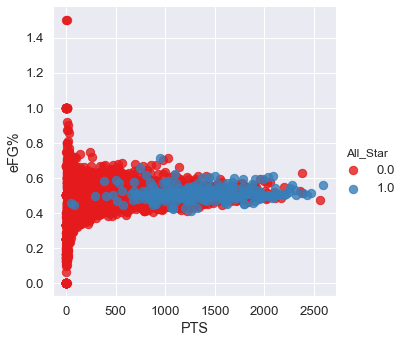

In [15]:
sns.lmplot('PTS','eFG%', data=players, hue='All_Star',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

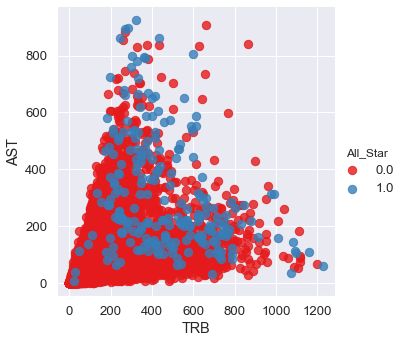

In [16]:
sns.lmplot('TRB','AST', data=players, hue='All_Star',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

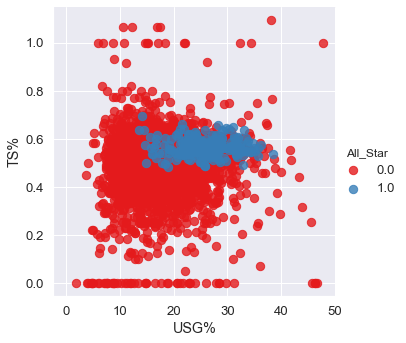

In [17]:
sns.lmplot('USG%','TS%', data=players, hue='All_Star',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

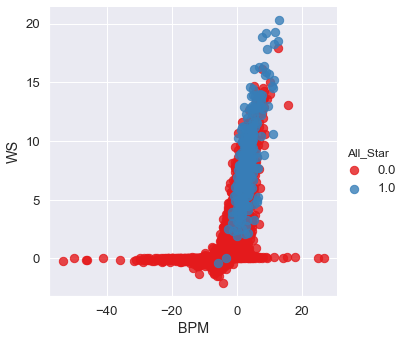

In [18]:
sns.lmplot('BPM','WS', data=players, hue='All_Star',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

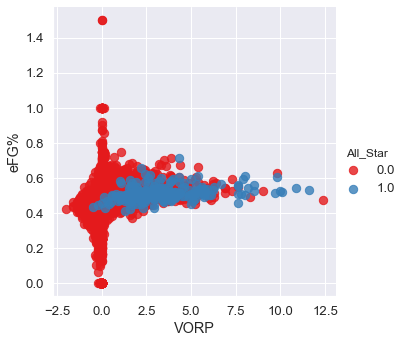

In [19]:
sns.lmplot('VORP','eFG%', data=players, hue='All_Star',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

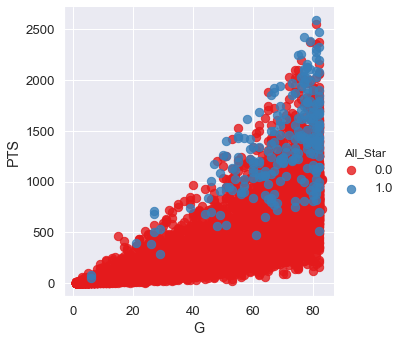

In [20]:
sns.lmplot('G','PTS', data=players, hue='All_Star',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

#### Changing values of Team and Position attributes into more discrete values

2 different conferences (East, West)

2 different positions  (Guard, Forward)

In [21]:
name_changes = {"NOK": "NOP","NOH":"NOP","SEA":"OKC","NJN":"BRK","CHA":"CHO"}
for key,value in name_changes.items():

    players.loc[players["Tm"] == key,"Tm"] = value

In [22]:
west = ['SAC', 'DAL', 'POR', 'HOU',  'UTA', 'DEN', 'MEM', 'GSW', 'PHO', 'SAS','MIN', 'LAC', 'LAL', 'OKC', 'NOP']
east = list(set(players['Tm'].unique()).difference(west))
east.remove('TOT')
teams = {"East":east, "West":west}

In [23]:
for team in players['Tm'].unique():
    for conference, conference_teams in teams.items():
        if team in conference_teams:
            players['Tm'].replace({team:conference}, inplace=True)

In [24]:
positions = {'Guard':['PG','SG','PG-SG','SG-PF','SG-PG','SG-SF'],
             'Forward':['SF','PF','C','PF-C','SF-SG','C-SF', 'PF-SF', 'C-PF', 'SF-PF']}

for position in players['Pos'].unique():
    for key, val in positions.items():
        if position in val:
            players['Pos'].replace({position: key},inplace=True)

#### Dealing with missing values

In [25]:
players.isnull().sum()

Year           0
Player         0
Pos           37
Age           37
Tm             0
G             37
GS            37
MP            37
PER           40
TS%           70
3PAr          70
FTr           70
ORB%          40
DRB%          40
TRB%          40
AST%          40
STL%          40
BLK%          40
TOV%          64
USG%          40
OWS           37
DWS           37
WS            37
WS/48         40
OBPM          37
DBPM          37
BPM           37
VORP          37
FG            37
FGA           37
FG%           70
3P            37
3PA           37
3P%         1033
2P            37
2PA           37
2P%           89
eFG%          70
FT            37
FTA           37
FT%          311
ORB           37
DRB           37
TRB           37
AST           37
STL           37
BLK           37
TOV           37
PF            37
PTS           37
All_Star       0
dtype: int64

In [26]:
print(players[players['3P%'].isnull()]['3PA'].unique(),
players[players['FT%'].isnull()]['FTA'].unique(),
players[players['2P%'].isnull()]['2PA'].unique(), sep='\n')

[ 0. nan]
[ 0. nan]
[ 0. nan]


In [27]:
players['3P%'].fillna(0,inplace=True)
players['FT%'].fillna(0,inplace=True)
players['2P%'].fillna(0,inplace=True)

In [28]:
players = players[players['Year'] < 2017]
players = players[players['Tm'] != 'TOT']

In [29]:
players.dropna(axis=0,how='any', inplace=True)

#### Encoding Team and Position Attributes


In [30]:
label_encoder = LabelEncoder()
players['Tm']= label_encoder.fit_transform(players['Tm'])
players['Pos'] = label_encoder.fit_transform(players['Pos'])

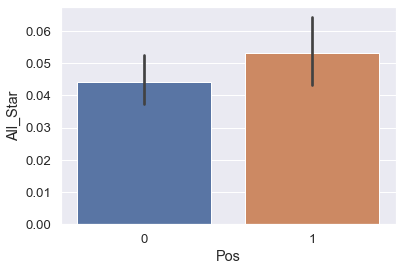

In [31]:
sns.barplot(x="Pos",y ="All_Star",data=players)

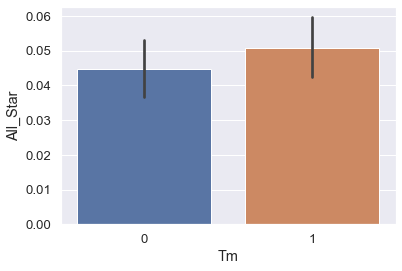

In [32]:
sns.barplot(x="Tm",y ="All_Star",data=players)

### Preparing Data and Training Model

In [33]:
X = players.drop("All_Star", axis=1)
y = players["All_Star"]

##### Removing redundant attributes that depend on one another and other attributes that don't give much info to model

In [34]:
X.drop(columns=['Year','Player','Pos','Age','Tm', 'GS','3PAr', 'FTr', 'ORB%',
                'DRB%','TOV%', 'FGA', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
               'FT', 'FTA', 'ORB', 'DRB','TOV','PF'],axis=1,inplace=True)

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [36]:
sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train)

### Training and Evaluating Model with different Machine Learning Techniques

In [37]:
C = 0.01
penalty = 'l2'
lsvc = LinearSVC(C=C,penalty=penalty, dual=False)

lsvc.fit(X_train,y_train)
y_pred = lsvc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1127
         1.0       0.74      0.38      0.51        52

    accuracy                           0.97      1179
   macro avg       0.86      0.69      0.74      1179
weighted avg       0.96      0.97      0.96      1179



In [38]:
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)

y_pred = knc.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1127
         1.0       0.75      0.40      0.53        52

    accuracy                           0.97      1179
   macro avg       0.86      0.70      0.75      1179
weighted avg       0.96      0.97      0.96      1179



In [39]:
rfc = RandomForestClassifier(max_features='auto')
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1127
         1.0       0.70      0.44      0.54        52

    accuracy                           0.97      1179
   macro avg       0.84      0.72      0.76      1179
weighted avg       0.96      0.97      0.96      1179



In [40]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1127
         1.0       0.23      0.90      0.37        52

    accuracy                           0.86      1179
   macro avg       0.61      0.88      0.65      1179
weighted avg       0.96      0.86      0.90      1179

